# **Log Data Processing**

### **Load Packages**

In [1]:
# Import other necessary packages for data configuration and plotting
import matplotlib.pyplot as plt

from pyCoreRelator.log.ml_log_data_imputation import (
    preprocess_core_data,
    plot_core_logs,
    process_and_fill_logs
)

<hr>

### **Define data structure**

#### Define core name and core length

In [ ]:
# core_name = "M9907-01PC"  # Core name
# total_length_cm = 218     # Core length in cm

# core_name = "M9907-02TC"  # Core name
# total_length_cm = 154     # Core length in cm

# core_name = "M9907-03PC"  # Core name
# total_length_cm = 349     # Core length in cm

# core_name = "M9907-05TC"  # Core name
# total_length_cm = 231     # Core length in cm

# core_name = "M9907-06PC"  # Core name
# total_length_cm = 129     # Core length in cm

# core_name = "M9907-07PC"  # Core name
# total_length_cm = 160     # Core length in cm

# core_name = "M9907-07TC"  # Core name
# total_length_cm = 216     # Core length in cm

# core_name = "M9907-08PC"  # Core name
# total_length_cm = 484     # Core length in cm

# core_name = "M9907-08TC"  # Core name
# total_length_cm = 207     # Core length in cm

# core_name = "M9907-09PC"  # Core name
# total_length_cm = 496     # Core length in cm

# core_name = "M9907-09TC"  # Core name
# total_length_cm = 251     # Core length in cm

# core_name = "M9907-10PC"  # Core name
# total_length_cm = 471     # Core length in cm

# core_name = "M9907-11PC"  # Core name
# total_length_cm = 439  # Core length in cm

# core_name = "M9907-12PC"  # Core name
# total_length_cm = 488     # Core length in cm

# core_name = "M9907-14PC"  # Core name
# total_length_cm = 452     # Core length in cm

# core_name = "M9907-14TC"  # Core name
# total_length_cm = 199     # Core length in cm

# core_name = "M9907-15PC"  # Core name
# total_length_cm = 255     # Core length in cm

# core_name = "M9907-16PC"  # Core name
# total_length_cm = 451     # Core length in cm

# core_name = "M9907-17PC"  # Core name
# total_length_cm = 478     # Core length in cm

# core_name = "M9907-18PC"  # Core name
# total_length_cm = 303     # Core length in cm

# core_name = "M9907-19PC"  # Core name
# total_length_cm = 497     # Core length in cm

# core_name = "M9907-20PC"  # Core name
# total_length_cm = 494     # Core length in cm

# core_name = "M9907-21PC"  # Core name
# total_length_cm = 453     # Core length in cm

# core_name = "M9907-22PC"  # Core name
# total_length_cm = 501     # Core length in cm

# core_name = "M9907-22TC"  # Core name
# total_length_cm = 173     # Core length in cm

# core_name = "M9907-23PC"  # Core name
# total_length_cm = 783     # Core length in cm

# core_name = "M9907-25PC"  # Core name
# total_length_cm = 797     # Core length in cm

# core_name = "M9907-26PC"  # Core name
# total_length_cm = 273     # Core length in cm

# core_name = "M9907-27PC"  # Core name
# total_length_cm = 637     # Core length in cm

# core_name = "M9907-28PC"  # Core name
# total_length_cm = 198     # Core length in cm

# core_name = "M9907-29PC"  # Core name
# total_length_cm = 796     # Core length in cm

# core_name = "M9907-30PC"  # Core name
# total_length_cm = 781     # Core length in cm

# core_name = "M9907-31PC"  # Core name
# total_length_cm = 767     # Core length in cm

####

# core_name = "RR0207-01KC"  # Core name
# total_length_cm = 249  # Core length in cm

# core_name = "RR0207-02PC"  # Core name
# total_length_cm = 501     # Core length in cm

# core_name = "RR0207-55KC"  # Core name
# total_length_cm = 354     # Core length in cm

# core_name = "RR0207-56PC"  # Core name
# total_length_cm = 794     # Core length in cm

####

# core_name = "TN0909-01JC"  # Core name
# total_length_cm = 789.4    # Core length in cm

# core_name = "TN0909-28JC"  # Core name
# total_length_cm = 765    # Core length in cm


#### Define file path, data configuration, and outliner cut-off thresholds for ML data processing

In [3]:
# First get subfolder paths that were previously calculated outside the function
# Determine MST and HRMS subfolder paths based on core name
if core_name.startswith('M99'):
    mst_subfolder = "OSU orignal dataset/R-V_Melville99/Calibrated_MST/"
    hrms_subfolder = "OSU orignal dataset/R-V_Melville99/M9907_point_mag/"
elif core_name.startswith('RR02'):
    mst_subfolder = "OSU orignal dataset/R-V_Revelle02/Calibrated_MST/"
    hrms_subfolder = "OSU orignal dataset/R-V_Revelle02/RR0207_point_mag/"
elif core_name.startswith('TN09'):
    mst_subfolder = "OSU orignal dataset/R-V_Thompson09/Calibrated_MST/"
    hrms_subfolder = "OSU orignal dataset/R-V_Thompson09/TN0909_point_mag/"

# Data configuration for ML data imputation
# This replaces all hardcoded column names and parameters in the functions
data_config = {
    # Core information
    'mother_dir': '/Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/',
    'core_name': core_name,
    'core_length': total_length_cm,
    'data_folder': f'_compiled_logs/{core_name}/',
    'clean_output_folder': f'_compiled_logs/{core_name}/ML_clean/',
    'filled_output_folder': f'_compiled_logs/{core_name}/ML_filled/',
    
    # Input file paths for raw data
    'input_file_paths': {
        'ct': f'_compiled_logs/{core_name}/{core_name}_CT.csv',
        'rgb': f'_compiled_logs/{core_name}/{core_name}_RGB.csv',
        'hrms': f'{hrms_subfolder}{core_name}_ptMS.csv',
        'mst': f'{mst_subfolder}{core_name}_MST.csv'
    },
    
    # File paths for cleaned data
    'clean_file_paths': {
        'ct': f'{core_name}_CT_clean.csv',
        'rgb': f'{core_name}_RGB_clean.csv',
        'hrms': f'{core_name}_hiresMS_clean.csv',
        'mst': f'{core_name}_MST_clean.csv'
    },
    
    'filled_file_paths': {
        'ct': f'{core_name}_CT_MLfilled.csv',
        'rgb': f'{core_name}_RGB_MLfilled.csv',
        'hrms': f'{core_name}_hiresMS_MLfilled.csv',
        'mst': f'{core_name}_MST_MLfilled.csv'
    },
    
    # Primary depth column name
    'depth_column': 'SB_DEPTH_cm',
    
    # Target depth resolution for resampling. If not provided, the original depth resolution will be used.
    'target_depth_resolution': 0.5,  # Resample to 1-unit (cm in this case) depth intervals

    # Column configs with all information consolidated including plotting controls
    'column_configs': {
        'ct': {
            'data_col': 'CT', 
            'std_col': 'CT_std', 
            'depth_col': 'SB_DEPTH_cm',
            'plot_label': 'CT\nBrightness',
            'plot_colors': ['black'],
            'show_colormap': True,
            'colormap': 'jet',
            'image_path': f'_compiled_logs/{core_name}/{core_name}_CT.tiff'
        },
        # 'rgb': {
        #     'data_cols': ['R', 'G', 'B', 'Lumin'],
        #     'std_cols': ['R_std', 'G_std', 'B_std', 'Lumin_std'],
        #     'depth_col': 'SB_DEPTH_cm',
        #     'feature_weights': [0.5, 0.5, 0.5, 2.0],                           # corresponds to ['R', 'G', 'B', 'Lumin']
        #     'rgb_threshold': [35, 220, 2],                                     # [min_val, max_val, buffer_size] for extreme RGB values
        #     'group_in_subplot': True,                                          # Plot all RGB channels together
        #     'plot_label': 'RGB\nChannels',
        #     'plot_colors': ['red', 'green', 'blue', 'black'],                  # Colors for R, G, B, Lumin curves
        #     'colormap_cols': ['Lumin'],                                        # Which columns should show colormap visualization
        #     'colormap': 'inferno',                                             # Colormap for Lumin
        #     'image_path': f'_compiled_logs/{core_name}/{core_name}_RGB.tiff',
        #     'additional_feature_source': 'mst',                                # Source data type for additional features
        #     'additional_feature_columns': ['Den_gm/cc']                        # Specific columns to use as additional features
        # },
            'rgb': {
            'data_cols': ['Lumin'],
            'std_cols': ['Lumin_std'],
            'depth_col': 'SB_DEPTH_cm',
            'feature_weights': [2.0],                                          # corresponds to ['R', 'G', 'B', 'Lumin']
            'rgb_threshold': [35, 220, 2],                                     # [min_val, max_val, buffer_size] for extreme RGB values
            'group_in_subplot': True,                                          # Plot all RGB channels together
            'plot_label': 'Relative\nLuminance',
            'plot_colors': ['black'],                                          # Colors for R, G, B, Lumin curves
            'colormap_cols': ['Lumin'],                                        # Which columns should show colormap visualization
            'colormap': 'inferno',                                             # Colormap for Lumin
            'image_path': f'_compiled_logs/{core_name}/{core_name}_RGB.tiff',
            'additional_feature_source': 'mst',                                # Source data type for additional features
            'additional_feature_columns': ['Den_gm/cc']                        # Specific columns to use as additional features
        },
        'hrms': {
            'data_col': 'hiresMS', 
            'depth_col': 'SB_DEPTH_cm',
            'plot_label': 'High-Res\nMagnetic\nSusceptibility\n(μSI)',
            'plot_color': 'darkgreen',
            'feature_weight': 3.0,
            'threshold': ['<=',5, 1]
        },
        'mst': {
            'ms': {
                'data_col': 'MS', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'Low-Res\nMagnetic\nSusceptibility\n(μSI)',
                'plot_color': 'lightgreen',
                'feature_weight': 1.0,
                'threshold': ['>', 250, 1]
            },
            'density': {
                'data_col': 'Den_gm/cc', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'Density\n(g/cc)',
                'plot_color': 'orange',
                'feature_weight': 2.0,
                'threshold': ['<', 1.1, 1]
            },
            'pwvel': {
                'data_col': 'PWVel_m/s', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'P-wave\nVelocity\n(m/s)',
                'plot_color': 'purple',
                'feature_weight': 0.01,
                'threshold': ['>=', 1076, 1]
                # 'threshold': ['<=', 1200, 1]
            },
            'pwamp': {
                'data_col': 'PWAmp', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'P-wave\nAmplitude',
                'plot_color': 'purple',
                'feature_weight': 0.01,
                'threshold': ['>=', 80, 1]
                # 'threshold': ['<=', 0.2, 1]
            },
            'elecres': {
                'data_col': 'ElecRes_ohmm', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'Electrical\nResistivity\n(ohm-m)',
                'plot_color': 'brown',
                'feature_weight': 0.01,
                'threshold': ['>', 0.51, 1]
            }
        }
    }
}

### Data cleaning

Starting data cleaning...
Processing rgb data...
Resampling rgb data to 0.5 depth resolution...
Saved cleaned rgb data to: /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/_compiled_logs/TN0909-28JC/ML_clean/TN0909-28JC_RGB_clean.csv
Processing ct data...
Resampling ct data to 0.5 depth resolution...
Saved cleaned ct data to: /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/_compiled_logs/TN0909-28JC/ML_clean/TN0909-28JC_CT_clean.csv
Processing mst data...
Resampling mst data to 0.5 depth resolution...
Saved cleaned mst data to: /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/_compiled_logs/TN0909-28JC/ML_clean/TN0909-28JC_MST_clean.csv
Processing hrms data...
Resampling hrms data to 0.5 depth resolution...
Sav

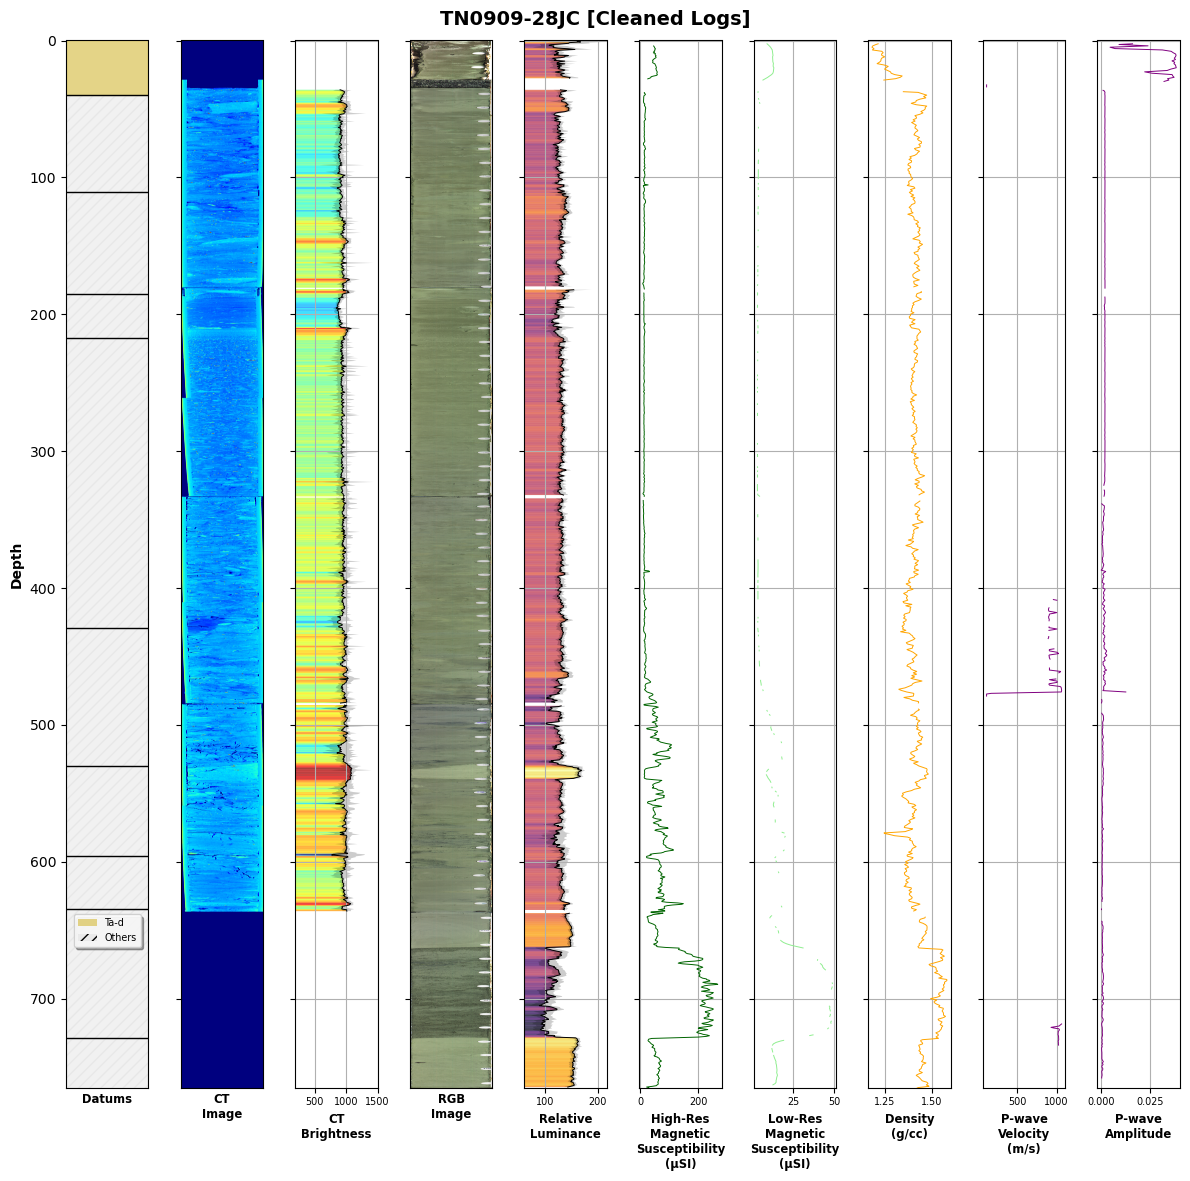

In [4]:
# Run data cleaning function - now completely driven by data_config
print("Starting data cleaning...")
preprocess_core_data(data_config)

# Plot processed logs using new function signature
fig, axes = plot_core_logs(
    data_config,                           # Data configuration containing all parameters
    file_type='clean',                     # Type of data files to plot ('clean' or 'filled')
    pickeddepth_csv=f'pickeddepth/{core_name}_pickeddepth.csv',   # Path to picked depth CSV file
    title=f'{core_name} [Cleaned Logs]'      # Title for the plot figure
)

# Save the cleaned logs figure
fig.savefig(f'{data_config["mother_dir"]}{data_config["clean_output_folder"]}{core_name}_ML-clean.png', 
            dpi=300, bbox_inches='tight')
fig.savefig(f'{data_config["mother_dir"]}{data_config["clean_output_folder"]}{core_name}_ML-clean.svg', dpi=300, 
            bbox_inches='tight', format='svg')



### ML-based data gap filling

In [5]:
# process_and_fill_logs(data_config,              # Data configuration containing all parameters
#                       ml_method='xgblgbm')      # Available ml_method options: 'rf', 'rftc', 'xgb', 'xgblgbm'
#                                                 # - 'rf': Random Forest ML
#                                                 # - 'rftc': Random Forest ML with trend constraints
#                                                 # - 'xgb': XGBoost
#                                                 # - 'xgblgbm': Weighted-avergae ensemble between XGBoost + LightGBM        

#### Plot ML-based gap-filled log diagram

Successfully loaded picked depths CSV with 9 rows


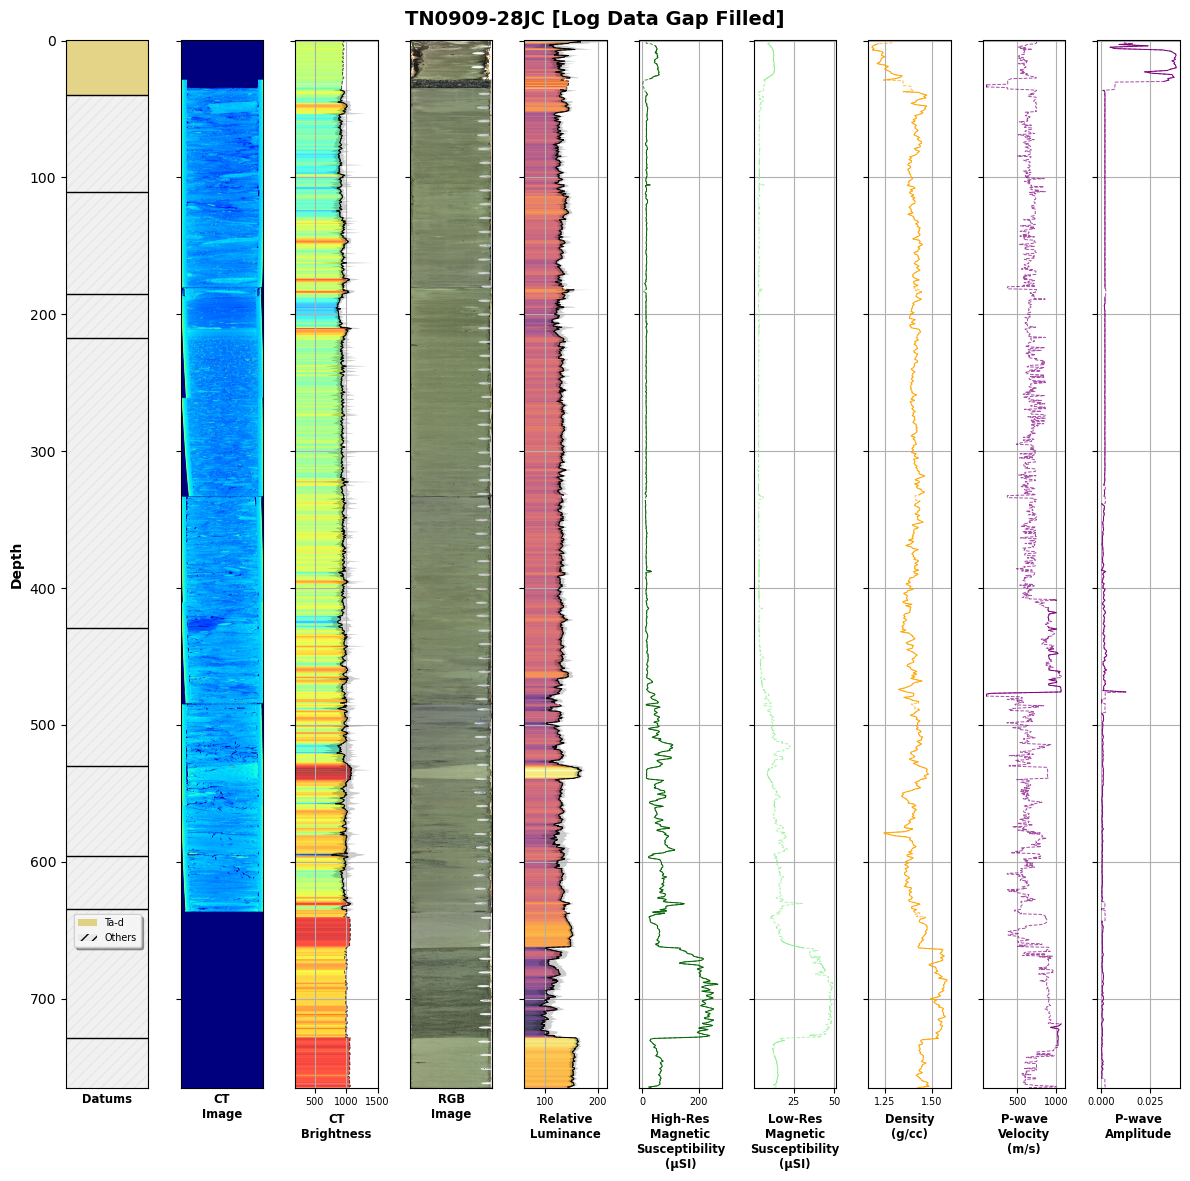

In [6]:
# Plot ML-based gap-filled log diagram
fig, axes = plot_core_logs(
    data_config,                                                  # Data configuration containing all parameters
    file_type='filled',                                           # Type of data files to plot ('filled' for gap-filled data)
    pickeddepth_csv=f'pickeddepth/{core_name}_pickeddepth.csv',   # Path to picked depth CSV file
    title=f'{core_name} [Log Data Gap Filled]'                    # Title for the plot figure
)

# Save the cleaned logs figure
fig.savefig(f'{data_config["mother_dir"]}{data_config["filled_output_folder"]}{core_name}_ML-filled.png', 
            dpi=300, bbox_inches='tight')
# Also save as SVG for vector graphics
fig.savefig(f'{data_config["mother_dir"]}{data_config["filled_output_folder"]}{core_name}_ML-filled.svg', dpi=300, 
            bbox_inches='tight', format='svg')
